In [10]:
# 3 = Name
# 5 = Roster Position
# 6 = Salary
# 9 = Expected Points
#pg sg sf pf c g f util

playerList = readcsv("DKsalaries.csv")
numPlayers = trunc(Int,(length(playerList)/9))
optimalroster = 0;
salaryCap = 50000

50000

In [7]:
using JuMP, Mosek

m = Model(solver=MosekSolver(LOG=0))

@variable(m, players[2:numPlayers], Int)
@variable(m, pg[2:numPlayers], Bin)
@variable(m, sg[2:numPlayers], Bin)
@variable(m, sf[2:numPlayers], Bin)
@variable(m, pf[2:numPlayers], Bin)
@variable(m, c[2:numPlayers], Bin)
@variable(m, f[2:numPlayers], Bin)
@variable(m, g[2:numPlayers], Bin)
@variable(m, util[2:numPlayers], Bin)

@constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)

    
    for i in 2:numPlayers
        
        @constraint(m,players[i] <= 1) 
        
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i] <= 1)
        else
            @constraint(m,pg[i] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i] <= 1)
        else
           @constraint(m,sg[i] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i] <= 1)
        else
            @constraint(m,sf[i] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i] <= 1)
        else
            @constraint(m,pf[i] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i] <= 1)
        else
            @constraint(m,c[i] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i] <= 1)
        else
            @constraint(m,g[i] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i] <= 1)
        else
            @constraint(m,f[i] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i] <= 1)
        else
            @constraint(m,util[i] == 0)
        end

    end  

    @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= salaryCap)
    
    for i in 2:numPlayers
            @constraint(m, pg[i] + sg[i] + sf[i] +g[i]+ pf[i] + c[i] + f[i] + util[i] - players[i] == 0)
    end
    
    @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )
    

    
    @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:numPlayers))
    
        
solve(m)
println("Expected Points ", getobjectivevalue(m))
                                    
optimalRoster = getobjectivevalue(m)
                                            
p = getvalue(players)
pg = getvalue(pg)
sg = getvalue(sg)
sf = getvalue(sf)
pf = getvalue(pf)
g = getvalue(g)
f = getvalue(f)
c = getvalue(c)
util = getvalue(util)

for i in 2:numPlayers 
    if trunc(p[i]) > 0 && pg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
    end
    if trunc(p[i]) > 0 && sg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
    end
    if trunc(p[i]) > 0 && sf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
    end
    if trunc(p[i]) > 0 && pf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
    end
    if trunc(p[i]) > 0 && g[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
    end
    if trunc(p[i]) > 0 && f[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
    end
    if trunc(p[i]) > 0 && c[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
    end
    if trunc(p[i]) > 0 && util[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
    end
end
                                            

Expected Points 267.4100000000003
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Robert Covington 5600 28.13 F
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C
Kyle Anderson 4000 22.58 SF
Tyler Johnson 3900 22.1 G


In [11]:
numRosters = 5

using JuMP, Cbc

m = Model(solver=CbcSolver())


@variable(m, 0<= players[2:numPlayers,1:numRosters]<=1, Int)
@variable(m, pg[2:numPlayers,1:numRosters], Bin)
@variable(m, sg[2:numPlayers,1:numRosters], Bin)
@variable(m, sf[2:numPlayers,1:numRosters], Bin)
@variable(m, pf[2:numPlayers,1:numRosters], Bin)
@variable(m, c[2:numPlayers,1:numRosters], Bin)
@variable(m, f[2:numPlayers,1:numRosters], Bin)
@variable(m, g[2:numPlayers,1:numRosters], Bin)
@variable(m, util[2:numPlayers,1:numRosters], Bin)
@variable(m, totalPoints >= 0)
@variable(m, rosterPoints[1:numRosters] >= 0)

for j in 1:numRosters
    @constraint(m, sum(players[i,j]  for i in 2:numPlayers) <= 8)
end
    
for j in 1:numRosters    
    for i in 2:numPlayers
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i,j] <= 1)
        else
            @constraint(m,pg[i,j] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i,j] <= 1)
        else
           @constraint(m,sg[i,j] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i,j] <= 1)
        else
            @constraint(m,sf[i,j] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i,j] <= 1)
        else
            @constraint(m,pf[i,j] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i,j] <= 1)
        else
            @constraint(m,c[i,j] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i,j] <= 1)
        else
            @constraint(m,g[i,j] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i,j] <= 1)
        else
            @constraint(m,f[i,j] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i,j] <= 1)
        else
            @constraint(m,util[i,j] == 0)
        end

    end  
end
    
for j in 1:numRosters
        @constraint(m, sum( players[i,j] * playerList[i,6]  for i in 2:numPlayers) <= salaryCap)
end
        
for j in 1:numRosters   
    for i in 2:numPlayers
        @constraint(m, pg[i,j] + sg[i,j] + sf[i,j] + pf[i,j] + c[i,j] + f[i,j] + g[i,j] + util[i,j] - players[i,j] == 0)
    end
end
    
for j in 1:numRosters
    @constraint(m, sum(pg[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(g[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i,j] for i in 2:numPlayers) <= 1 )
end

   
       
for i in 1:numRosters
    @constraint(m,rosterPoints[i] - sum(players[j,i] * playerList[j,9] for j in 2:92) <= 0)
    @constraint(m,rosterPoints[i] - sum(players[j,i] * playerList[j,9] for j in 2:92) >= 0)
end
                                            
for i in 2:numRosters
    @constraint(m, rosterPoints[i - 1] - rosterPoints[i] - .01 >= 0 )
end
                        
@objective(m,Max,sum(rosterPoints))

solve(m)

rosterPoints = getvalue(rosterPoints)

p = getvalue(players)
pg = getvalue(pg)
sg = getvalue(sg)
sf = getvalue(sf)
pf = getvalue(pf)
g = getvalue(g)
f = getvalue(f)
c = getvalue(c)
util = getvalue(util)
    
for j in 1:numRosters 
    println("Expected Points: ",rosterPoints[j])
                                            
for i in 2:numPlayers
    if p[i,j] > .1 && pg[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
    end
    if p[i,j] > .1 && sg[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
    end
    if p[i,j] > .1 && sf[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
    end
    if p[i,j] > .1 && pf[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
    end
    if p[i,j] > .1 && g[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
    end
    if p[i,j] > .1 && f[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
    end
    if p[i,j] > .1 && c[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
    end
    if p[i,j] > .1 && util[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
    end
                                                 
end
    println()
    println()
end


Expected Points: 267.41
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 G
CJ McCollum 6700 34.42 SG
Robert Covington 5600 28.13 SF
Hassan Whiteside 5400 33.77 C
Pau Gasol 4500 27.1 UTIL
Kyle Anderson 4000 22.58 PF
Tyler Johnson 3900 22.1 PG


Expected Points: 266.54999999999995
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 G
Robert Covington 5600 28.13 PF
Hassan Whiteside 5400 33.77 C
Pau Gasol 4500 27.1 UTIL
E'Twaun Moore 4100 21.72 SF
Tyler Johnson 3900 22.1 SG


Expected Points: 265.92
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Hassan Whiteside 5400 33.77 UTIL
JJ Redick 5200 26.64 SF
Pau Gasol 4500 27.1 C
Kyle Anderson 4000 22.58 F
Tyler Johnson 3900 22.1 G


Expected Points: 265.88000000000005
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 G
CJ McCollum 6700 34.42 SG
Goran Dragic 6300 31.19 PG
Hassan Whiteside 5400 33.77 C
Pau Gasol 4500 27.1 UTIL
Kyle Anderson 4000 22.58 SF
Bam Adebayo 3200 17.

In [14]:

optimalRoster = 1000;
values = zeros(100)
using JuMP, Mosek


for number in 1:5

m = Model(solver=MosekSolver(LOG=0))

@variable(m, players[2:numPlayers], Bin)
@variable(m, pg[2:numPlayers], Bin)
@variable(m, sg[2:numPlayers], Bin)
@variable(m, sf[2:numPlayers], Bin)
@variable(m, pf[2:numPlayers], Bin)
@variable(m, c[2:numPlayers], Bin)
@variable(m, f[2:numPlayers], Bin)
@variable(m, g[2:numPlayers], Bin)
@variable(m, util[2:numPlayers], Bin)

@constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)
    
    for i in 2:numPlayers
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i] <= 1)
        else
            @constraint(m,pg[i] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i] <= 1)
        else
           @constraint(m,sg[i] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i] <= 1)
        else
            @constraint(m,sf[i] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i] <= 1)
        else
            @constraint(m,pf[i] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i] <= 1)
        else
            @constraint(m,c[i] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i] <= 1)
        else
            @constraint(m,g[i] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i] <= 1)
        else
            @constraint(m,f[i] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i] <= 1)
        else
            @constraint(m,util[i] == 0)
        end

    end  

    @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= 50000)
    
    for i in 2:numPlayers
                @constraint(m, pg[i] + sg[i] + sf[i] + pf[i] + c[i]+ g[i] + f[i] + util[i] - players[i] == 0)
    end
    
    @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )
    
    @constraint(m,sum(players[i] * playerList[i,9] for i in 2:92) <= optimalRoster -.001)
    
    @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:92))
    
        
        solve(m)
println("Expected Points For Roster ",number,": ", getobjectivevalue(m))
                                                              
optimalRoster = getobjectivevalue(m)
values[number] = optimalRoster
                              
p = getvalue(players)
pg = getvalue(pg)
sg = getvalue(sg)
sf = getvalue(sf)
pf = getvalue(pf)
g = getvalue(g)
f = getvalue(f)
c = getvalue(c)
util = getvalue(util)
                                                   
println("Cost: ",sum(p[i]*playerList[i,6] for i in 2:numPlayers))

for i in 2:numPlayers 
    if p[i] > .1 && pg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
    end
    if p[i] > .1 && sg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
    end
    if p[i] > .1 && sf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
    end
    if p[i] > .1 && pf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
    end
    if p[i] > .1 && g[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
    end
    if p[i] > .1 && f[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
    end
    if p[i] > .1 && c[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
    end
    if p[i] > .1 && util[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
    end
end
println()                                       
end

Expected Points For Roster 1: 267.41000000000065
Cost: 49900.00000000012
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 G
CJ McCollum 6700 34.42 PG
Robert Covington 5600 28.13 F
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C
Kyle Anderson 4000 22.58 SF
Tyler Johnson 3900 22.1 SG

Expected Points For Roster 2: 266.55
Cost: 50000.0
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 G
CJ McCollum 6700 34.42 SG
Robert Covington 5600 28.13 PF
Hassan Whiteside 5400 33.77 C
Pau Gasol 4500 27.1 UTIL
E'Twaun Moore 4100 21.72 SF
Tyler Johnson 3900 22.1 PG

Expected Points For Roster 3: 265.92
Cost: 49500.0
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 G
Hassan Whiteside 5400 33.77 UTIL
JJ Redick 5200 26.64 F
Pau Gasol 4500 27.1 C
Kyle Anderson 4000 22.58 SF
Tyler Johnson 3900 22.1 SG

Expected Points For Roster 4: 265.88000000000005
Cost: 49900.0
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Goran Dragic 

In [ ]:

numPerSalary = 20
salaryIncrements = 100
using JuMP, Gurobi,PyPlot, Mosek
result = zeros(salaryIncrements) #Most optimal roster
result2 = zeros(salaryIncrements) #20th (numPerSalary) most optimal roster
cap = collect(1000:1000:100000) 

for z in 3:salaryIncrements
    optimalRoster = 1000
    playerList = readcsv("DKsalaries2.csv")
    numPlayers = trunc(Int,(length(playerList)/9))
    
    for number in 1:numPerSalary
    m = Model(solver=MosekSolver(LOG=0))
    @variable(m, players[2:numPlayers], Bin)
    @variable(m, pg[2:numPlayers], Bin)
    @variable(m, sg[2:numPlayers], Bin)
    @variable(m, sf[2:numPlayers], Bin)
    @variable(m, pf[2:numPlayers], Bin)
    @variable(m, c[2:numPlayers], Bin)
    @variable(m, f[2:numPlayers], Bin)
    @variable(m, g[2:numPlayers], Bin)
    @variable(m, util[2:numPlayers], Bin)
    @constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)
        for i in 2:numPlayers
            if contains(playerList[i,5],"PG")
                @constraint(m,pg[i] <= 1)
            else
                @constraint(m,pg[i] == 0)
            end
            if contains(playerList[i,5],"SG")
                @constraint(m,sg[i] <= 1)
            else
               @constraint(m,sg[i] == 0)
            end
            if contains(playerList[i,5],"SF")
                @constraint(m,sf[i] <= 1)
            else
                @constraint(m,sf[i] == 0)
            end
            if contains(playerList[i,5],"PF")
                @constraint(m,pf[i] <= 1)
            else
                @constraint(m,pf[i] == 0)
            end
             if contains(playerList[i,5],"C")
                @constraint(m,c[i] <= 1)
            else
                @constraint(m,c[i] == 0)
            end       
            if contains(playerList[i,5],"G")
                @constraint(m,g[i] <= 1)
            else
                @constraint(m,g[i] == 0)
            end
            if contains(playerList[i,5],"F")
                @constraint(m,f[i] <= 1)
            else
                @constraint(m,f[i] == 0)
            end
            if contains(playerList[i,5],"UTIL")
                @constraint(m,util[i] <= 1)
            else
                @constraint(m,util[i] == 0)
            end
        end  
        @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= cap[z])
        for i in 2:numPlayers
                @constraint(m, pg[i] + sg[i] + sf[i]+g[i] + pf[i] + c[i] + f[i] + util[i] - players[i] == 0)
        end
        @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )
        
        @constraint(m,sum(players[i] * playerList[i,9] for i in 2:92) <= optimalRoster -.001)

        @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:92))
            solve(m);
        val = getobjectivevalue(m)
        if number == 1
            result[z]= val
        end
        if number == numPerSalary
            result2[z] = val
        end
        optimalRoster = val
end

end
  

figure(figsize=(8,4))
plot(cap,result,"r.", markersize=5)
plot(cap,result2,"b.", markersize=5)
#plot( xfine, yfine, "b-")
axis([0,100000,0,400])
grid("on")
ylabel("Expected Number of Points")
xlabel("Salary Cap")
legend("Most Optimal Roster", "20th Most Optimal Roster")


In [ ]:
difference = zeros(100)
for i in 3:100
    difference[i] = result[i]-result2[i]
end

figure(figsize=(8,4))
plot(cap,difference,"g.", markersize=5)

axis([0,100000,0,10])
grid("on")
ylabel("Difference Between 1st and 20th Most Optimal Roster")
xlabel("Salary Cap")


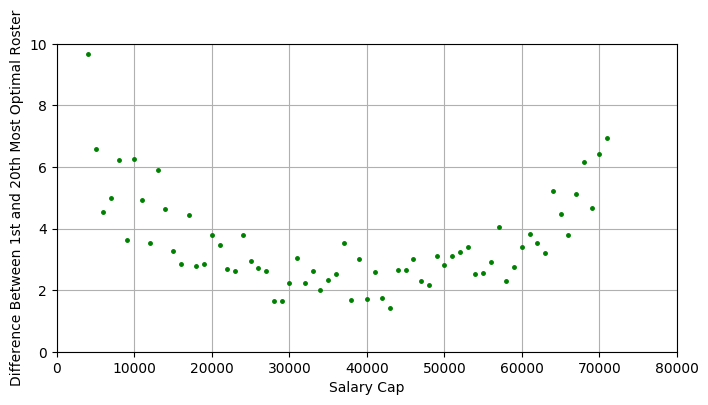

69


In [51]:
points = difference[3:71]
y = points
x = collect(3000:1000:71000)
using PyPlot
figure(figsize=(8,4))
plot(x,y,"g.", markersize=5)
axis([0,80000,0,10])
grid("on")
ylabel("Difference Between 1st and 20th Most Optimal Roster")
xlabel("Salary Cap")
println(length(points))

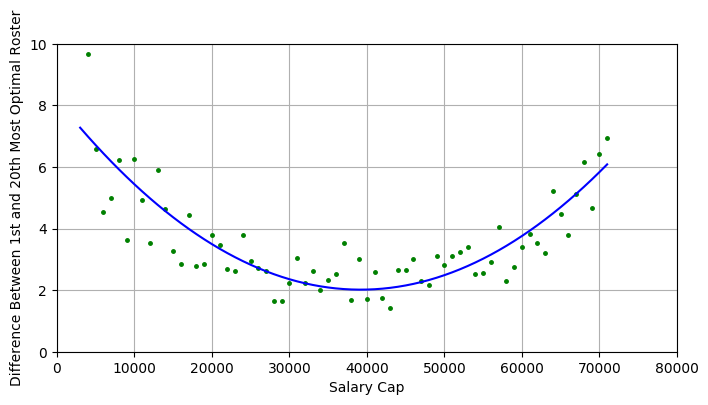

MOSEK warning 57: A large value of -8.8e+11 has been specified in cx for variable '' (0).


PyObject <matplotlib.text.Text object at 0x145aa4450>

In [52]:
m = Model(solver=MosekSolver(LOG=0))


@variable(m, u[1:3])

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
    npts = length(x)
    differencex = x #linspace(0,10,npts)
    differencey = ones(npts)
#ffine = ones(npts)
for i in 1:npts
        differencey[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
    end

figure(figsize=(8,4))
plot( x, y, "g.", markersize=5)
plot( differencex, differencey, "b-")
axis([0,80000,0,10])
grid()
ylabel("Difference Between 1st and 20th Most Optimal Roster")
xlabel("Salary Cap")
#println(getobjectivevalue(m))

#println(getvalue(u))
    



[17.92, 22.58, 27.1, 33.77, 41.2, 47.87, 51.69, 60.87, 65.79, 70.45, 78.79, 83.45, 88.37, 94.03, 101.37, 105.55, 111.54, 118.4, 123.47, 128.12, 134.12, 140.98, 145.19, 150.37, 156.22, 160.46, 165.7, 171.53, 177.94, 182.18, 187.42, 191.85, 197.12, 202.04, 207.95, 211.11, 217.08, 220.27, 225.89, 229.85, 234.26, 240.29, 244.5

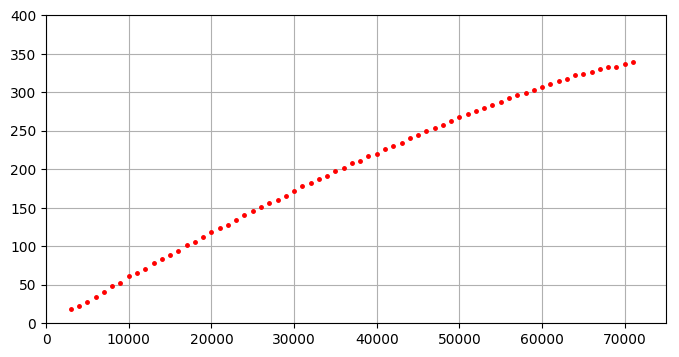

, 249.42, 253.22, 257.77, 263.23, 267.41, 271.69, 275.87, 279.93, 283.34, 287.4, 291.94, 296.49, 298.79, 303.33, 307.39, 311.21, 314.11, 317.34, 322.1, 323.77, 325.94, 330.45, 333.26, 333.26, 336.88, 339.05]


In [38]:
points = result[3:71]
y = points
x = collect(3000:1000:71000)
using PyPlot
figure(figsize=(8,4))
plot(x,y,"r.", markersize=5)
axis([0,75000,0,400])
grid("on")
println(points)

MOSEK warning 57: A large value of -6.8e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).


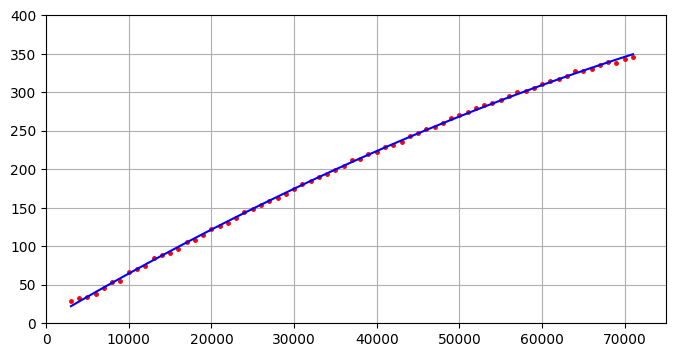

242.32688367459923
[-2.04302e-8, 0.00632519, 3.36798]


In [37]:
m = Model(solver=MosekSolver(LOG=0))

@variable(m, u[1:3])

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
npts = length(x)
newx = x 
newy = ones(npts)

for i in 1:npts
    newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3]
end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=5)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
println(getobjectivevalue(m))

println(getvalue(u))

MOSEK warning 57: A large value of -6.8e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).


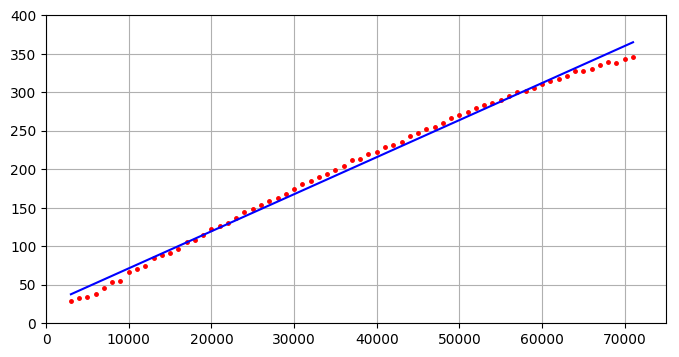

3865.272069157567
[-0.0, 0.00481336, 23.2329]


In [36]:
m = Model(solver=MosekSolver(LOG=0))


@variable(m, u[1:3])
@constraint(m, u[1] == 0)

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
npts = length(x)
newx = x #linspace(0,10,npts)
newy = ones(npts)
for i in 1:npts
    newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=5)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
println(getobjectivevalue(m))

println(getvalue(u))


In [ ]:
points = result[5:71] + difference[5:71].^2

y = points
x = collect(5000:1000:71000)

using PyPlot
figure(figsize=(8,4))
plot(x,y,"r.", markersize=5)
axis([0,75000,0,400])
grid("on")
#println(result)

MOSEK warning 57: A large value of -7.1e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).
67


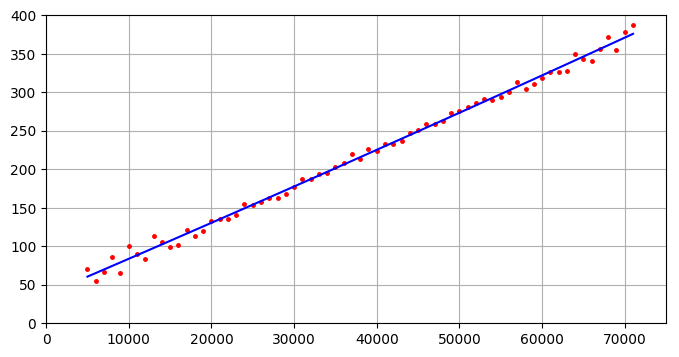

2758.9577332017943
[2.32286e-9, 0.00460125, 37.5121]


In [78]:
m = Model(solver=MosekSolver(LOG=0))

@variable(m, u[1:3])

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
    println(length(x))
npts = length(x)
newx = x 
newy = ones(npts)

for i in 1:npts
    newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3]
end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=5)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
println(getobjectivevalue(m))

println(getvalue(u))

MOSEK warning 57: A large value of -7.1e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).


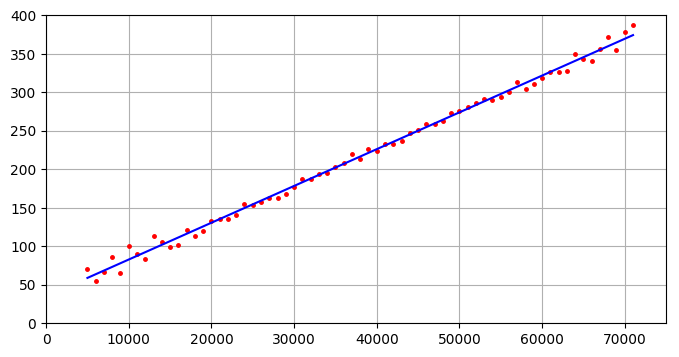

2799.3838401287794
[-0.0, 0.00477779, 35.0266]


In [77]:
m = Model(solver=MosekSolver(LOG=0))


@variable(m, u[1:3])
@constraint(m, u[1] == 0)

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:length(x))  )

status = solve(m)

uopt = getvalue(u)

using PyPlot
    npts = length(x)
newx = x #linspace(0,10,npts)
newy = ones(npts)
for i in 1:npts
    newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=5)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
println(getobjectivevalue(m))

println(getvalue(u))
